In [1]:
# Advanced data augmentation
# Setup the enviornment

In [2]:
!pip install tensorflow
!pip install matplotlib

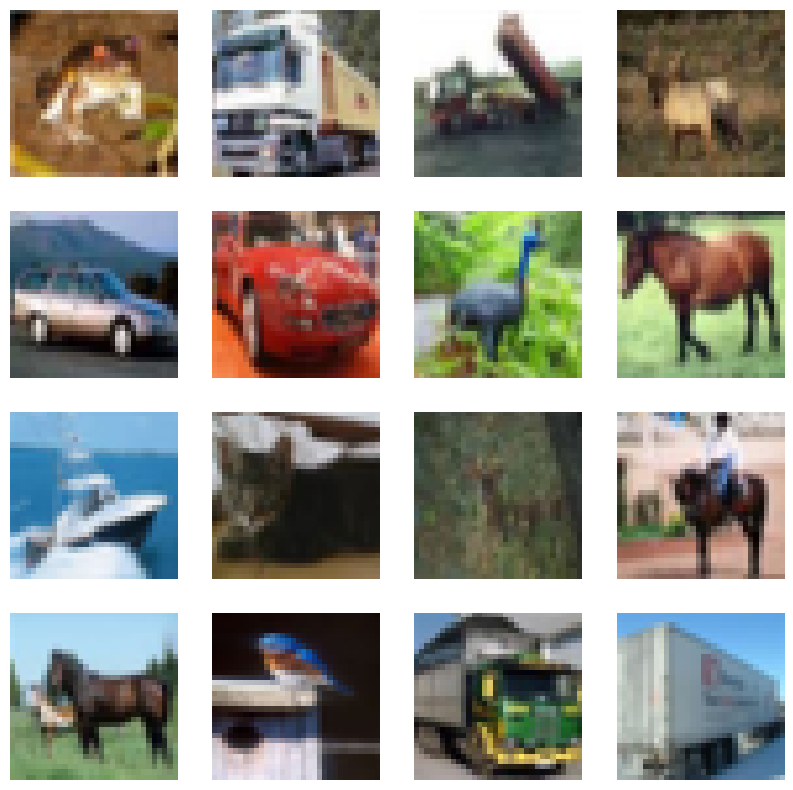

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

#load data
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

#normalize the pixel value training images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#display a sample of the training images
plt.figure(figsize=(10,10))
# create new graph(10,10)
for i in range(16):

  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.axis('off') # hide AXIS
plt.show()

In [4]:
from PIL import Image, ImageDraw
#create a black white image
image = Image.new('RGB',(224,224),(255,255,255))

#draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50,50),(174,174)],fill = (255,0,0))

#save the image
image.save('sample.jpg')


In [5]:
# basic data agumentaion
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array


# LOAD THE SAMPLE DATA
img_path = 'sample.jpg'
img = load_img(img_path)
x= img_to_array(img)
x=np.expand_dims(x,axis=0)

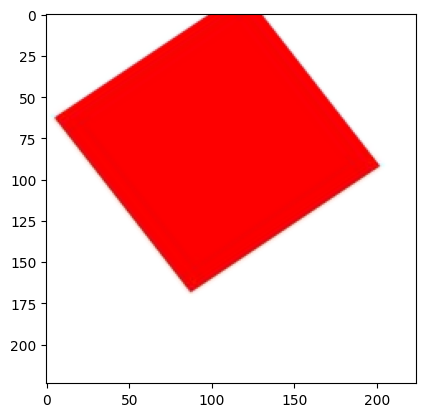

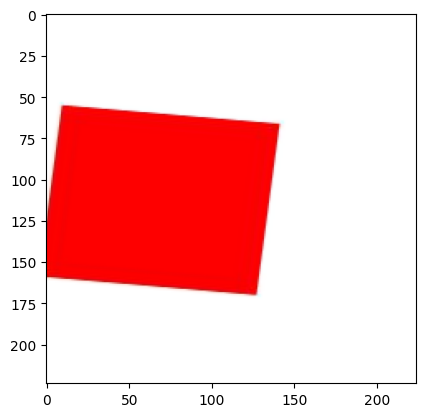

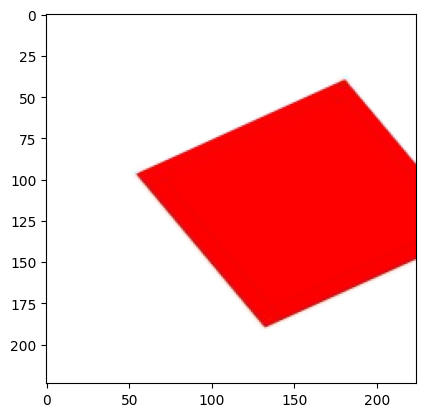

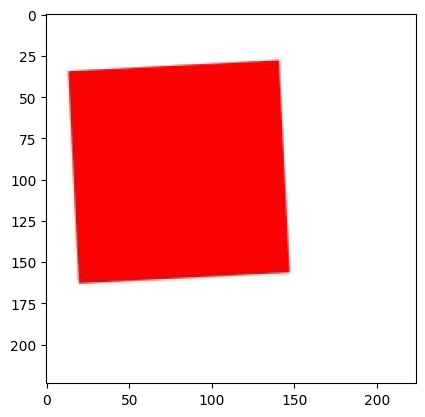

In [7]:
#create an instance of ImageDataGenarator with basic agumentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

# generate batchs of agumented images
# visualisation
i=0
for batch in datagen.flow(x,batch_size=1): #datagen.flow : create infinite new image
                                           # batch_size = 1, meanimg 'creating only a image'
  plt.figure(i) # create new figrue(like paper) then print each images
  imgplot=plt.imshow(batch[0].astype('uint8'))
  # batch[i]- generated new image
  i +=1
  if i %4 ==0: #create only four images and done.
    break

plt.show()

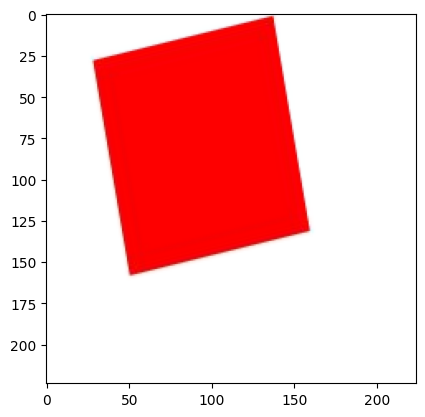

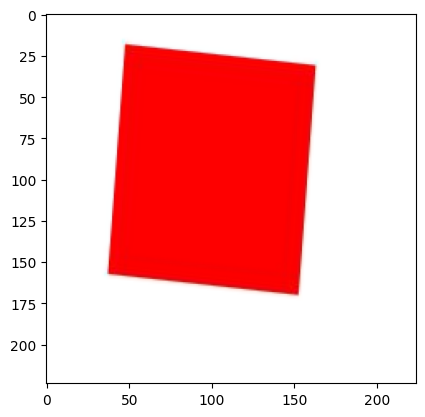

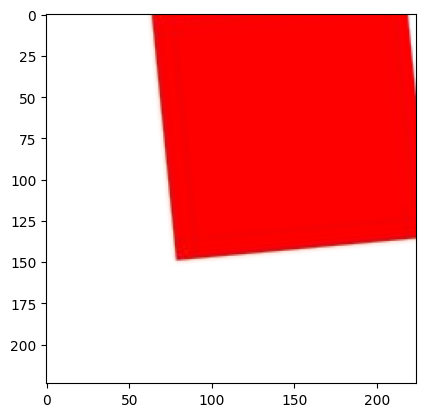

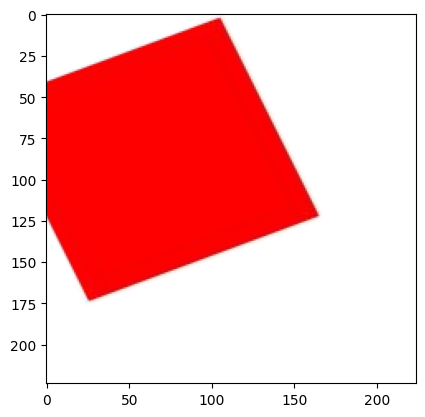

In [13]:

## feature-wise and sample-wise normalization
dataget= ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# load the sample image and fit the generator
datagen.fit(x)

#generate batches for normalized images
i=0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot=plt.imshow(batch[0].astype('uint8'))
  i+=1
  if i%4==0:
    break

plt.show()



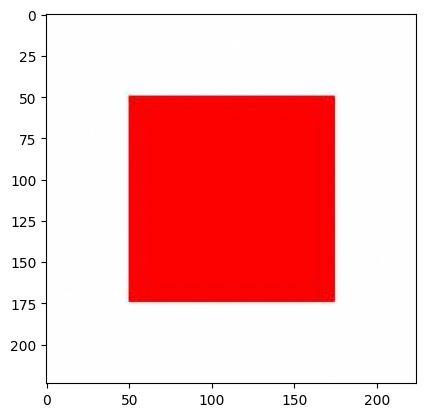

In [15]:
#custom data augmentation function

#define a custom data agumentation fuction
def add_random_noise(image):
  noise =np.random.normal(0,0.1,image.shape)
  return image+noise


#create an instance of Imagedatagenarator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# genertor batch
i=0
for batch in datagen.flow(x, batch_size =1):
  plt.figure(i)
  implot = plt.imshow(batch[0].astype('uint8'))
  i+=1
  if i&4 ==0:
    break

plt.show()

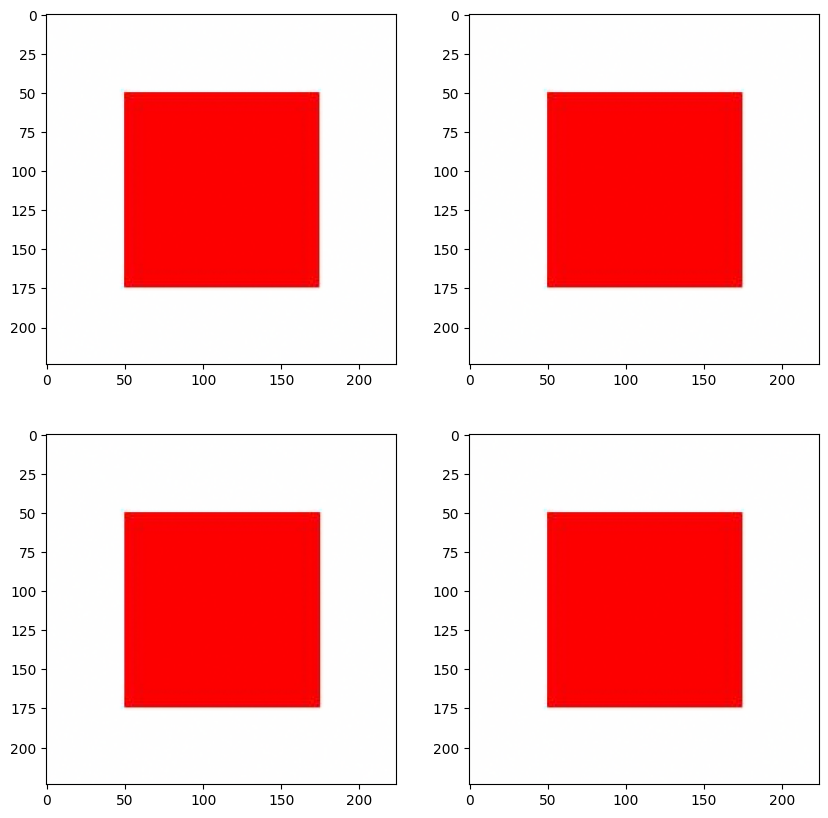

In [19]:
# visualisatoin
plt.figure(figsize=(10,10))
for i,batch in enumerate(datagen.flow(x, batch_size=1)):
  if i >=4:
    break
  plt.subplot(2,2, i+1)
  plt.imshow(batch[0].astype('uint8'))

plt.show()